# 6.3 Geographical Visualizations: Airbnb Mallorca

## Table of Contents
### 1. Importing libraries and dataset
### 2. Data Wrangling
### 3. Data Cleaning
### 4. Plotting a choropleth
### 5. Results


### 1. Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import geojson

In [2]:
# propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Import ".GEOjson" file for Airbnb Mallorca 

mallorca_geo = r'C:\Users\svand\Documents\15-04-2024 Airbnb Mallorca\02 Data\Original Data\neighbourhoods.geojson'

In [5]:
json_geo_open = open(mallorca_geo)
json_geo = json.load(json_geo_open)

In [6]:
json_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[3.420972, 39.751591],
       [3.419807, 39.750217],
       [3.415091, 39.745113],
       [3.413972, 39.731701],
       [3.409915, 39.726471],
       [3.403051, 39.723774],
       [3.381682, 39.703648],
       [3.38606, 39.69186],
       [3.382151, 39.691761],
       [3.381153, 39.688393],
       [3.390076, 39.684414],
       [3.399185, 39.684628],
       [3.393531, 39.671234],
       [3.387322, 39.667351],
       [3.384927, 39.664383],
       [3.375412, 39.663956],
       [3.367024, 39.667347],
       [3.363938, 39.672382],
       [3.349256, 39.667336],
       [3.341514, 39.662098],
       [3.337259, 39.667336],
       [3.330406, 39.667328],
       [3.321638, 39.662075],
       [3.327846, 39.656307],
       [3.328224, 39.647404],
       [3.323083, 39.640228],
       [3.313795, 39.639652],
       [3.303546, 39.644104],
       [3.298395, 39.652325],
       [3.294

In [7]:
path = r'C:\Users\svand\Documents\15-04-2024 Airbnb Mallorca'

In [8]:
# importing dataframe

df_selected = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_checked_explored_updated.csv'), index_col = False)

### 2. Data Wrangling

In [9]:
df_selected.head()

,Unnamed: 0,id,listing_url,name,picture_url,host_since,host_is_superhost,location,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category
0,0,18184333,https://www.airbnb.com/rooms/18184333,Quinze Germans,https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,f,Andratx,39.543490,2.390930,...,4.56,4.44,4.72,4.78,4.78,4.94,4.28,0.23,190.0,low in bookings
1,1,664248507739787372,https://www.airbnb.com/rooms/664248507739787372,Villa Alcanada Mar,https://a0.muscache.com/pictures/prohost-api/H...,2022-05-05,f,Alcudia,39.836700,3.151310,...,5.00,5.00,5.00,3.00,4.00,5.00,5.00,0.09,579.0,low in bookings
2,2,629002706694235276,https://www.airbnb.com/rooms/629002706694235276,"Villa Beach Alcudia, near the beach with jacuzzi",https://a0.muscache.com/pictures/miso/Hosting-...,2018-02-13,f,Alcudia,39.824417,3.114876,...,5.00,5.00,5.00,4.90,4.90,5.00,5.00,0.47,450.0,average in bookings
3,3,1006393514540791109,https://www.airbnb.com/rooms/1006393514540791109,Habitación matrimonial con A/C,https://a0.muscache.com/pictures/miso/Hosting-...,2019-11-20,f,Palma de Mallorca,39.553815,2.692827,...,5.00,5.00,5.00,5.00,5.00,5.00,4.00,0.77,52.0,low in bookings
4,4,41395364,https://www.airbnb.com/rooms/41395364,SANTA CATALINA PENTHOUSE,https://a0.muscache.com/pictures/8bda3e0a-3dd7...,2014-06-19,f,Palma de Mallorca,39.571850,2.634970,...,4.62,4.63,4.45,4.85,4.75,4.77,4.50,1.21,67.0,average in bookings


In [10]:
# drop the unnamed column

df_selected.drop(df_selected.columns[df_selected.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

In [11]:
df_selected.head()

,id,listing_url,name,picture_url,host_since,host_is_superhost,location,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category
0,18184333,https://www.airbnb.com/rooms/18184333,Quinze Germans,https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,f,Andratx,39.543490,2.390930,Entire home,...,4.56,4.44,4.72,4.78,4.78,4.94,4.28,0.23,190.0,low in bookings
1,664248507739787372,https://www.airbnb.com/rooms/664248507739787372,Villa Alcanada Mar,https://a0.muscache.com/pictures/prohost-api/H...,2022-05-05,f,Alcudia,39.836700,3.151310,Entire villa,...,5.00,5.00,5.00,3.00,4.00,5.00,5.00,0.09,579.0,low in bookings
2,629002706694235276,https://www.airbnb.com/rooms/629002706694235276,"Villa Beach Alcudia, near the beach with jacuzzi",https://a0.muscache.com/pictures/miso/Hosting-...,2018-02-13,f,Alcudia,39.824417,3.114876,Entire home,...,5.00,5.00,5.00,4.90,4.90,5.00,5.00,0.47,450.0,average in bookings
3,1006393514540791109,https://www.airbnb.com/rooms/1006393514540791109,Habitación matrimonial con A/C,https://a0.muscache.com/pictures/miso/Hosting-...,2019-11-20,f,Palma de Mallorca,39.553815,2.692827,Private room in rental unit,...,5.00,5.00,5.00,5.00,5.00,5.00,4.00,0.77,52.0,low in bookings
4,41395364,https://www.airbnb.com/rooms/41395364,SANTA CATALINA PENTHOUSE,https://a0.muscache.com/pictures/8bda3e0a-3dd7...,2014-06-19,f,Palma de Mallorca,39.571850,2.634970,Entire rental unit,...,4.62,4.63,4.45,4.85,4.75,4.77,4.50,1.21,67.0,average in bookings


In [12]:
# rename the location to neighbourhood as in the geojson file:

df_selected.rename(columns={'location': 'neighbourhood'}, inplace=True)

In [13]:
df_selected.head()

,id,listing_url,name,picture_url,host_since,host_is_superhost,neighbourhood,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category
0,18184333,https://www.airbnb.com/rooms/18184333,Quinze Germans,https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,f,Andratx,39.543490,2.390930,Entire home,...,4.56,4.44,4.72,4.78,4.78,4.94,4.28,0.23,190.0,low in bookings
1,664248507739787372,https://www.airbnb.com/rooms/664248507739787372,Villa Alcanada Mar,https://a0.muscache.com/pictures/prohost-api/H...,2022-05-05,f,Alcudia,39.836700,3.151310,Entire villa,...,5.00,5.00,5.00,3.00,4.00,5.00,5.00,0.09,579.0,low in bookings
2,629002706694235276,https://www.airbnb.com/rooms/629002706694235276,"Villa Beach Alcudia, near the beach with jacuzzi",https://a0.muscache.com/pictures/miso/Hosting-...,2018-02-13,f,Alcudia,39.824417,3.114876,Entire home,...,5.00,5.00,5.00,4.90,4.90,5.00,5.00,0.47,450.0,average in bookings
3,1006393514540791109,https://www.airbnb.com/rooms/1006393514540791109,Habitación matrimonial con A/C,https://a0.muscache.com/pictures/miso/Hosting-...,2019-11-20,f,Palma de Mallorca,39.553815,2.692827,Private room in rental unit,...,5.00,5.00,5.00,5.00,5.00,5.00,4.00,0.77,52.0,low in bookings
4,41395364,https://www.airbnb.com/rooms/41395364,SANTA CATALINA PENTHOUSE,https://a0.muscache.com/pictures/8bda3e0a-3dd7...,2014-06-19,f,Palma de Mallorca,39.571850,2.634970,Entire rental unit,...,4.62,4.63,4.45,4.85,4.75,4.77,4.50,1.21,67.0,average in bookings


In [14]:
df_selected['review_scores_location'].describe().T

count    11973.000000
mean         4.705900
std          0.344746
min          1.000000
25%          4.580000
50%          4.800000
75%          4.970000
max          5.000000
Name: review_scores_location, dtype: float64

In [15]:
# Show properties with review_scores_location less than 4
df_selected[df_selected['review_scores_location'] < 4]

,id,listing_url,name,picture_url,host_since,host_is_superhost,neighbourhood,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_without_symbol,estimation_booking_category
56,554063856331706327,https://www.airbnb.com/rooms/554063856331706327,Ca Na Rosa (de Selva),https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,f,Selva,39.753230,2.895620,Entire rental unit,...,5.00,5.00,5.00,5.00,5.00,3.00,5.00,0.05,182.0,low in bookings
74,847465988535155792,https://www.airbnb.com/rooms/847465988535155792,Casa de Moha,https://a0.muscache.com/pictures/df139b6f-d597...,2021-06-24,f,Manacor,39.568903,3.216794,Private room in rental unit,...,4.29,4.57,4.29,4.14,4.57,3.86,4.57,0.64,45.0,average in bookings
94,959867001467159211,https://www.airbnb.com/rooms/959867001467159211,Amplio apartamento con terraza-B,https://a0.muscache.com/pictures/miso/Hosting-...,2017-06-12,t,Palma de Mallorca,39.552801,2.620819,Entire rental unit,...,4.75,4.75,5.00,5.00,5.00,3.75,3.75,0.62,243.0,average in bookings
144,20643515,https://www.airbnb.com/rooms/20643515,Cas Peix,https://a0.muscache.com/pictures/prohost-api/H...,2016-06-30,f,Sa Pobla,39.768520,3.016270,Entire villa,...,4.75,5.00,5.00,4.50,4.75,3.75,4.75,0.09,145.0,low in bookings
154,858626519501696758,https://www.airbnb.com/rooms/858626519501696758,Son Comte Nou,https://a0.muscache.com/pictures/prohost-api/H...,2022-10-07,f,Manacor,39.552745,3.248607,Entire home,...,5.00,5.00,5.00,4.00,5.00,3.00,5.00,0.13,352.0,low in bookings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,604932081488694939,https://www.airbnb.com/rooms/604932081488694939,Beautiful apartment with s and Outdoor swimming,https://a0.muscache.com/pictures/prohost-api/H...,2020-12-01,f,Santanyi,39.354862,3.205409,Entire rental unit,...,2.00,1.00,2.00,2.00,1.00,2.00,2.00,0.14,325.0,low in bookings
11644,732248300899384221,https://www.airbnb.com/rooms/732248300899384221,Ca Na Xisca,https://a0.muscache.com/pictures/prohost-api/H...,2022-07-13,f,Sa Pobla,39.772589,3.025024,Entire home,...,4.50,5.00,5.00,4.00,4.50,3.00,3.50,0.23,200.0,low in bookings
11698,52547878,https://www.airbnb.com/rooms/52547878,Obelisc-1,https://a0.muscache.com/pictures/prohost-api/H...,2018-04-16,f,Santa Margalida,39.762211,3.152729,Entire rental unit,...,4.00,4.00,4.00,5.00,5.00,3.00,4.00,0.07,55.0,low in bookings
11742,674422571750434925,https://www.airbnb.com/rooms/674422571750434925,Villa Mastaguera,https://a0.muscache.com/pictures/prohost-api/H...,2021-11-19,f,Pollensa,39.866164,3.046673,Entire villa,...,1.00,1.00,1.00,2.00,4.00,1.00,1.00,0.19,442.0,low in bookings


### 3. Data Cleaning

##### Extreme values check

<Axes: xlabel='review_scores_location', ylabel='Count'>

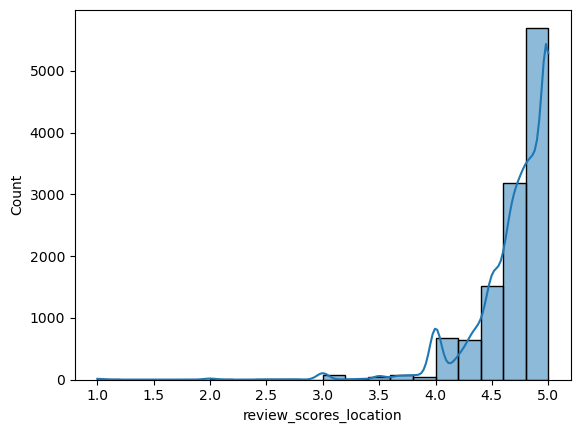

In [16]:
# Check the review scores location variable

sns.histplot(df_selected['review_scores_location'], bins=20, kde = True)

### 4. Plotting a choropleth

##### I am going to analyze the corelation between location and review scores location to see if there are clear visible neighbourhoods or listing areas of high value

In [17]:
# Group by 'neighbourhood' and calculate the average 'review_scores_location', then reset the index
data_to_plot = df_selected.groupby('neighbourhood')['review_scores_location'].mean().reset_index()

# Rename the column to 'average_review_scores_location' for clarity
data_to_plot.rename(columns={'review_scores_location': 'average_review_scores_location'}, inplace=True)

data_to_plot.head(64)

,neighbourhood,average_review_scores_location
0,Alaro,4.792162
1,Alcudia,4.716236
2,Algaida,4.595926
3,Andratx,4.801341
4,Ariany,4.609077
5,Arta,4.813807
6,Banyalbufar,4.679020
7,Binissalem,4.644861
8,Buger,4.667126
9,Bunyola,4.749836


In [18]:
# Check average review scores statistics
data_to_plot.describe()

,average_review_scores_location
count,53.000000
mean,4.685019
std,0.100677
min,4.494607
25%,4.617945
50%,4.673736
75%,4.749836
max,4.907778


From the above, the min score is 4.49... which is above 4. 
While there are properties with scores below 4, on average the scores for neighbourhoods are all above 4 indicating that there are more high rated properties than lower ones.

In [19]:
# Use central latitude and longitude of Mallorca to ensure map is appropriately zoomed
central_latitude = 39.6167
central_longitude = 2.9833

# Create a map centered around Mallorca with an appropriate zoom level
map = folium.Map(location=[central_latitude, central_longitude], zoom_start=10)

folium.Choropleth(
    geo_data=mallorca_geo,
    data=data_to_plot,
    columns=['neighbourhood', 'average_review_scores_location'],
    key_on='properties.neighbourhood',
    fill_color='YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name="Average Review Scores Location"
).add_to(map)

folium.LayerControl().add_to(map)

# Save the map to an HTML file
map.save('revloc_map2.html')

# Display the map
map

### 5. Results

#### Does the analysis answer any of your existing research questions?
##### The question is: What is the relationship between property location and guest satisfaction? When looking at the guest satisfaction regarding the location, we can see that there are differences even though the average review scores on location are all quite close to each other. Most of the highest average rating for location are on the west side of the island. This is where there are both mountains and beaches, giving a lot of variaty in activities for holidays. 
##### The neighbourhoods with the lowest average rates are located at the center of the island, further from the beach and not in the mountains.
#### Does the analysis lead you to any new research questions?
##### I am curious to analyse the specific question in a diffeent kind of map. Probably a point map to clearly show the diferences of the listing locations.

In [20]:
#export dataset

df_selected.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_choromap2.csv'))